In [128]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import matplotlib.cm as cm
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

# Load PIRUS Data
pirus = pd.read_csv('../data/clean_data/pirus_deep_clean_Final.csv')

# Load PIRUS Codebook
with open('../data/clean_data/modified_pirus_codebook.json') as f:
    pirus_codebook = json.load(f)
    
mask = pirus['loc_plot_state1_us_dummy'] == 1
pirus = pirus[mask]

# Work History

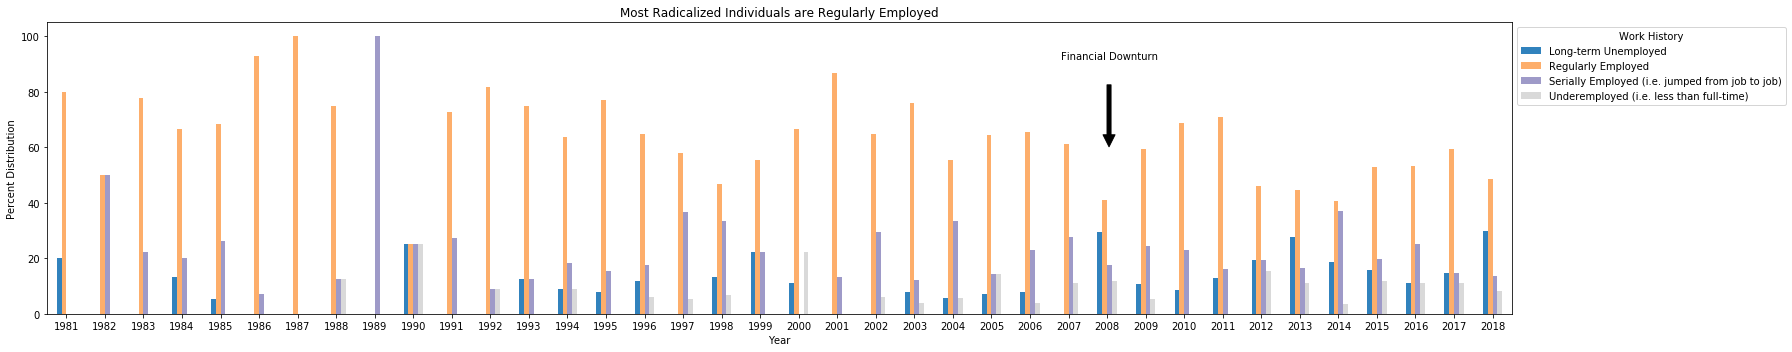

In [129]:
#create dataframe 
year_workhistory = pirus[['year', 'work_history']]

#drop empty fields
year_workhistory = year_workhistory.dropna(subset=['year'])
year_workhistory = year_workhistory.dropna(subset=['work_history'])

indexNames = year_workhistory[(year_workhistory['work_history'] == -88.0)].index 
year_workhistory.drop(indexNames , inplace=True)

#convert floats to integers
year_workhistory['year'] = year_workhistory['year'].astype(int)
year_workhistory['work_history'] = year_workhistory['work_history'].astype(int)

#create codebook name functions
wh_codes = pirus_codebook['work_history']['codes']
wh_fun = lambda x: wh_codes[str(x)]

#apply naming functions
year_workhistory['work_history'] = year_workhistory['work_history'].apply(wh_fun)

#create crosstab data
ax= pd.crosstab(year_workhistory['year'], year_workhistory['work_history']).apply(lambda r: r/r.sum()*100, axis=1)

ax1 = ax.plot.bar(figsize=(25,5), rot=0, colormap='tab20c')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Work History")
plt.xlabel('Year')
plt.ylabel('Percent Distribution')
plt.title('Most Radicalized Individuals are Regularly Employed')
ax1.annotate('Financial Downturn', xy=(.725, .5),  xycoords='axes fraction',
            xytext=(0.725, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.2),
            horizontalalignment='center', verticalalignment='top',
            )

plt.tight_layout()
plt.show()

violent,No,Yes
work_history,,
Underemployed (i.e. less than full-time),30.000000,70.000000
Serially Employed (i.e. jumped from job to job),30.718954,69.281046
Regularly Employed,47.555556,52.444444
Long-term Unemployed,31.034483,68.965517


/Users/jqnomad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


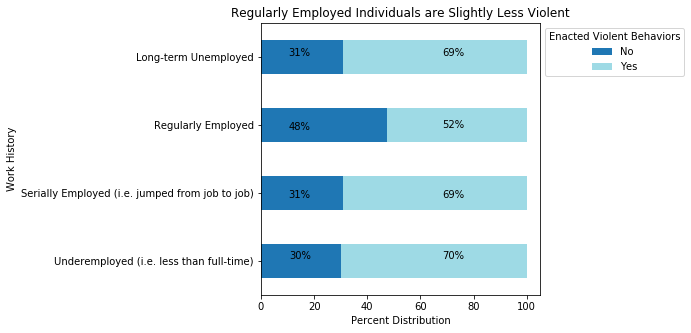

In [100]:
#create dataframe 
violence_workhistory = pirus[['violent', 'work_history']]

#drop empty fields
violence_workhistory = violence_workhistory.dropna(subset=['violent'])
violence_workhistory = violence_workhistory.dropna(subset=['work_history'])

indexNames = violence_workhistory[(violence_workhistory['work_history'] == -88.0)].index 
violence_workhistory.drop(indexNames , inplace=True)

#convert floats to integers
violence_workhistory['violent'] = violence_workhistory['violent'].astype(int)
violence_workhistory['work_history'] = violence_workhistory['work_history'].astype(int)

#create codebook name functions
v_codes = pirus_codebook['violent']['codes']
v_fun = lambda x: v_codes[str(x)]

wh_codes = pirus_codebook['work_history']['codes']
wh_fun = lambda x: wh_codes[str(x)]

#apply naming functions
violence_workhistory['violent'] = violence_workhistory['violent'].apply(v_fun)
violence_workhistory['work_history'] = violence_workhistory['work_history'].apply(wh_fun)

#create crosstab data
ax= pd.crosstab(violence_workhistory['work_history'], violence_workhistory['violent']).apply(lambda r: r/r.sum()*100, axis=1)
ax = ax.sort_values('work_history', ascending=False)
display(ax)
ax1 = ax.plot.barh(figsize=(5,5),stacked=True, rot=0, colormap='tab20')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Enacted Violent Behaviors")
plt.xlabel('Percent Distribution')
plt.ylabel('Work History')
plt.title('Regularly Employed Individuals are Slightly Less Violent')
ax1.annotate('30%',
            xy=(.25, .05), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('70%',
            xy=(.8, .05), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('31%',
            xy=(.25, .8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')   
ax1.annotate('69%',
            xy=(.8, .8), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')  
ax1.annotate('48%',
            xy=(.25, .525), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('52%',
            xy=(.8, .535), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('31%',
            xy=(.25, .275), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')
ax1.annotate('69%',
            xy=(.8, .275), xycoords='axes fraction',
            xytext=(-20, 20), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom')

plt.tight_layout()
plt.show()

# Employment Status

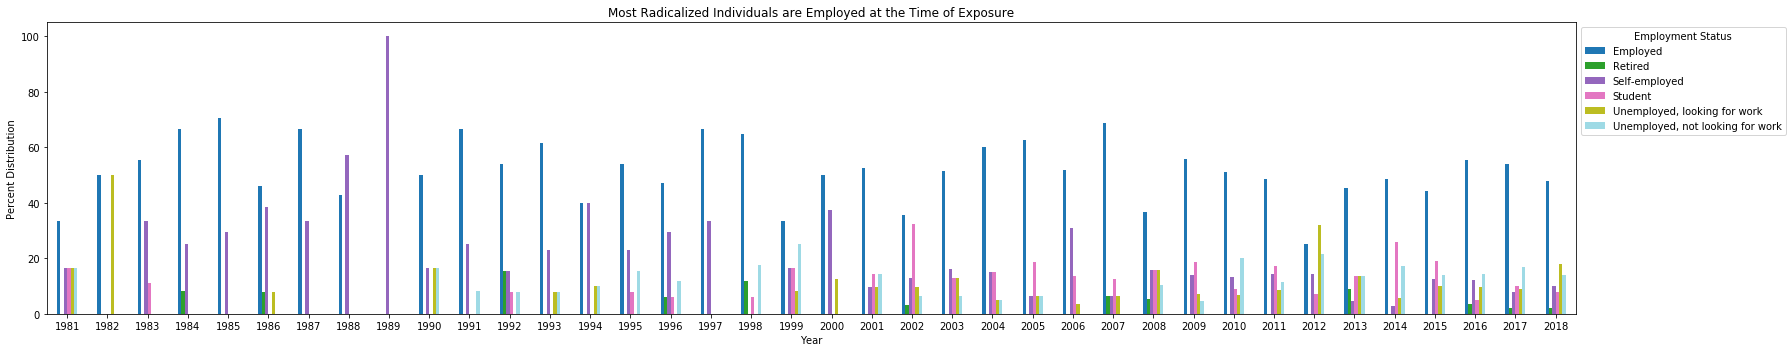

In [132]:
#create dataframe 
year_workhistory = pirus[['year', 'employment_status']]

#drop empty fields
year_workhistory = year_workhistory.dropna(subset=['year'])
year_workhistory = year_workhistory.dropna(subset=['employment_status'])


#convert floats to integers
year_workhistory['year'] = year_workhistory['year'].astype(int)
year_workhistory['employment_status'] = year_workhistory['employment_status'].astype(int)

#create codebook name functions
wh_codes = pirus_codebook['employment_status']['codes']
wh_fun = lambda x: wh_codes[str(x)]

#apply naming functions
year_workhistory['employment_status'] = year_workhistory['employment_status'].apply(wh_fun)

#create crosstab data
ax= pd.crosstab(year_workhistory['year'], year_workhistory['employment_status']).apply(lambda r: r/r.sum()*100, axis=1)

ax1 = ax.plot.bar(figsize=(25,5), rot=0, colormap='tab20')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Employment Status")
plt.xlabel('Year')
plt.ylabel('Percent Distribution')
plt.title('Most Radicalized Individuals are Employed at the Time of Exposure')
plt.tight_layout()

plt.show()

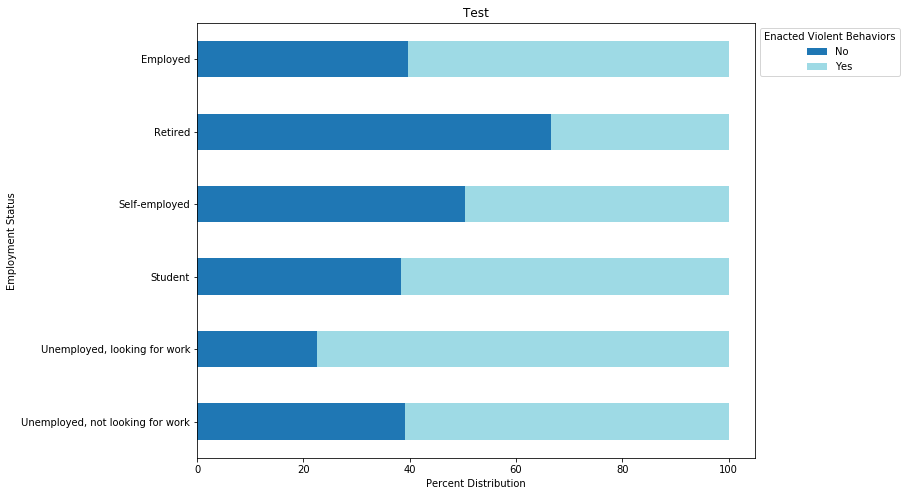

In [7]:
#create dataframe 
violence_employmentstatus = pirus[['violent', 'employment_status']]

#drop empty fields
violence_employmentstatus = violence_employmentstatus.dropna(subset=['violent'])
violence_employmentstatus = violence_employmentstatus.dropna(subset=['employment_status'])

#convert floats to integers
violence_employmentstatus['violent'] = violence_employmentstatus['violent'].astype(int)
violence_employmentstatus['employment_status'] = violence_employmentstatus['employment_status'].astype(int)

#create codebook name functions
v_codes = pirus_codebook['violent']['codes']
v_fun = lambda x: v_codes[str(x)]

es_codes = pirus_codebook['employment_status']['codes']
es_fun = lambda x: es_codes[str(x)]

#apply naming functions
violence_employmentstatus['violent'] = violence_employmentstatus['violent'].apply(v_fun)
violence_employmentstatus['employment_status'] = violence_employmentstatus['employment_status'].apply(es_fun)

#create crosstab data
ax= pd.crosstab(violence_employmentstatus['employment_status'], violence_employmentstatus['violent']).apply(lambda r: r/r.sum()*100, axis=1)
ax = ax.sort_values('employment_status', ascending=False)

ax1 = ax.plot.barh(figsize=(10,8),stacked=True, rot=0, colormap='tab20')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title="Enacted Violent Behaviors")
plt.xlabel('Percent Distribution')
plt.ylabel('Employment Status')
plt.title('Test')


plt.show()

# Ideological Family

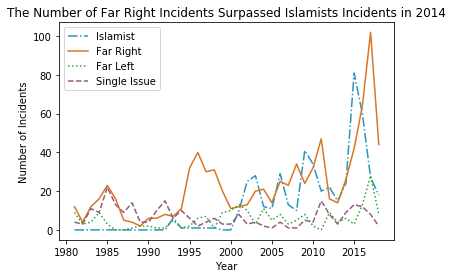

In [104]:
#create DF
year_ideologicalfamily = pirus[['year', 'radicalization_islamist','radicalization_far_right','radicalization_far_left','radicalization_single_issue']]

#sum the number of incidents
year_ideologicalfamily = year_ideologicalfamily.groupby(["year"]).sum()
year_ideologicalfamily = year_ideologicalfamily.reset_index()

#graph
plt.plot(year_ideologicalfamily['year'], year_ideologicalfamily['radicalization_islamist'], label = "Islamist", linestyle="-.", color='#2596be')
plt.plot(year_ideologicalfamily['year'], year_ideologicalfamily['radicalization_far_right'], label = "Far Right", linestyle="-", color ='#d9751f')
plt.plot(year_ideologicalfamily['year'], year_ideologicalfamily['radicalization_far_left'], label = "Far Left", linestyle=":", color ='#2ea12d')
plt.plot(year_ideologicalfamily['year'], year_ideologicalfamily['radicalization_single_issue'], label = "Single Issue", linestyle="--", color='#925c82')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('The Number of Far Right Incidents Surpassed Islamists Incidents in 2014')
plt.legend()
plt.show()
